In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical
# Load your CSV file
csv_file_path = '/content/drive/MyDrive/mnist_train.csv'

# Read data from CSV file into a pandas DataFrame
# Assuming the first column is the label column
df = pd.read_csv(csv_file_path, header=None)

# Extract labels and features
labels = df.iloc[:, 0].values
features = df.iloc[:, 1:].values / 255.0  # Normalize pixel values to be between 0 and 1

# Convert labels to one-hot encoding
labels_one_hot = to_categorical(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels_one_hot, test_size=0.2, random_state=42)

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize the weights with random values
        self.weights_input_hidden = np.random.uniform(-1, 1, size=(input_size, hidden_size))
        self.weights_hidden_output = np.random.uniform(-1, 1, size=(hidden_size, output_size))
        self.loss_history = {'train': [], 'validation': []}

    def train(self, inputs, targets, learning_rate):
    # Forward propagation
        hidden_inputs = np.dot(inputs, self.weights_input_hidden)
        hidden_outputs = sigmoid(hidden_inputs)

        output_inputs = np.dot(hidden_outputs, self.weights_hidden_output)
        output_outputs = sigmoid(output_inputs)

        # Backpropagation
        output_error = targets - output_outputs
        output_delta = output_error * sigmoid_derivative(output_outputs)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_outputs)

        # Update the weights
        self.weights_hidden_output += np.outer(hidden_outputs, output_delta) * learning_rate
        self.weights_input_hidden += np.outer(inputs, hidden_delta) * learning_rate

        # Compute and store the loss
        loss = np.mean(0.5 * (targets - output_outputs) ** 2)
        self.loss_history['train'].append(loss)

    def predict(self, inputs):
        hidden_inputs = np.dot(inputs, self.weights_input_hidden)
        hidden_outputs = sigmoid(hidden_inputs)

        output_inputs = np.dot(hidden_outputs, self.weights_hidden_output)
        output_outputs = sigmoid(output_inputs)

        return output_outputs
    def evaluate(self, X, y):
        correct = 0
        total_loss = 0

        for i in range(len(X)):
            inputs = X[i]
            target = y[i]

            # Forward propagation
            hidden_inputs = np.dot(inputs, self.weights_input_hidden)
            hidden_outputs = sigmoid(hidden_inputs)

            output_inputs = np.dot(hidden_outputs, self.weights_hidden_output)
            output_outputs = sigmoid(output_inputs)

            # Compute loss
            loss = np.mean(0.5 * (target - output_outputs) ** 2)
            total_loss += loss

            # Evaluate accuracy
            predicted = np.argmax(output_outputs)
            if predicted == np.argmax(target):
                correct += 1

        accuracy = correct / len(X) * 100
        average_loss = total_loss / len(X)
        return accuracy, average_loss

# Initialize the neural network
input_size = features.shape[1]  # Number of features
hidden_size = 64
output_size = 10  # 0-9 digits
learning_rate = 0.05

nn = NeuralNetwork(input_size, hidden_size, output_size)

# Training the neural network
epochs = 10

for epoch in range(epochs):
    # Training phase
    epoch_loss = 0  # Accumulate loss over the entire epoch
    for i in range(len(X_train)):
        inputs = X_train[i]
        target = y_train[i]
        nn.train(inputs, target, learning_rate)
        epoch_loss += nn.loss_history['train'][-1]  # Accumulate loss for this batch

    # Average the loss over the epoch and append to the history
    avg_epoch_loss = epoch_loss / len(X_train)
    nn.loss_history['train'].append(avg_epoch_loss)

    # Evaluation phase
    train_accuracy, train_loss = nn.evaluate(X_train, y_train)
    val_accuracy, val_loss = nn.evaluate(X_test, y_test)

    print(f"Epoch {epoch + 1}/{epochs}")
    print(f"Train Accuracy: {train_accuracy:.2f}%, Train Loss: {train_loss:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.2f}%, Validation Loss: {val_loss:.4f}")

    # Append the validation loss to the history
    nn.loss_history['validation'].append(val_loss)

# Plot the loss graph
# epochs_range = range(1, epochs + 1)
# plt.plot(epochs_range, nn.loss_history['train'][:-1], label='Train Loss', color='blue')
# plt.plot(epochs_range, nn.loss_history['validation'], label='Validation Loss', color='orange')
# plt.title('Training and Validation Loss Over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

Epoch 1/10
Train Accuracy: 89.69%, Train Loss: 0.0090
Validation Accuracy: 89.81%, Validation Loss: 0.0091
Epoch 2/10
Train Accuracy: 92.14%, Train Loss: 0.0069
Validation Accuracy: 91.98%, Validation Loss: 0.0071
Epoch 3/10
Train Accuracy: 93.34%, Train Loss: 0.0059
Validation Accuracy: 92.95%, Validation Loss: 0.0062
Epoch 4/10
Train Accuracy: 94.05%, Train Loss: 0.0053
Validation Accuracy: 93.44%, Validation Loss: 0.0057
Epoch 5/10
Train Accuracy: 94.54%, Train Loss: 0.0048
Validation Accuracy: 93.79%, Validation Loss: 0.0053
Epoch 6/10
Train Accuracy: 94.91%, Train Loss: 0.0045
Validation Accuracy: 94.16%, Validation Loss: 0.0050
Epoch 7/10
Train Accuracy: 95.29%, Train Loss: 0.0042
Validation Accuracy: 94.39%, Validation Loss: 0.0048
Epoch 8/10
Train Accuracy: 95.61%, Train Loss: 0.0039
Validation Accuracy: 94.67%, Validation Loss: 0.0046
Epoch 9/10
Train Accuracy: 95.92%, Train Loss: 0.0037
Validation Accuracy: 94.78%, Validation Loss: 0.0045
Epoch 10/10
Train Accuracy: 96.16%, T

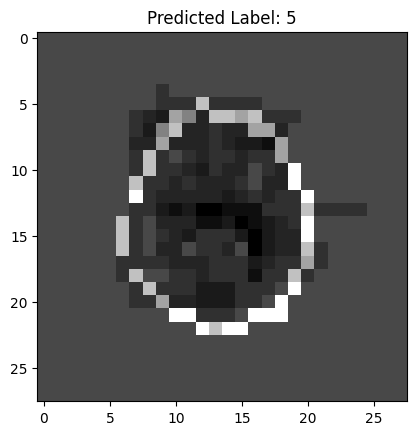

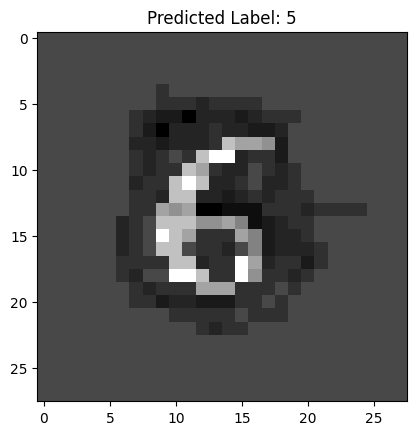

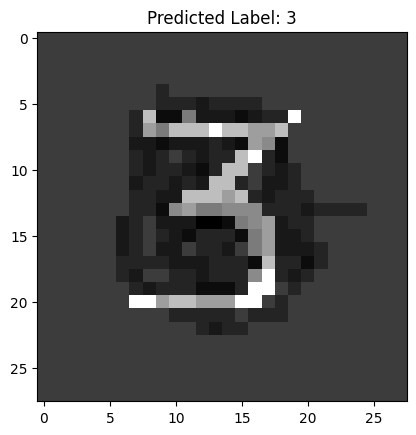

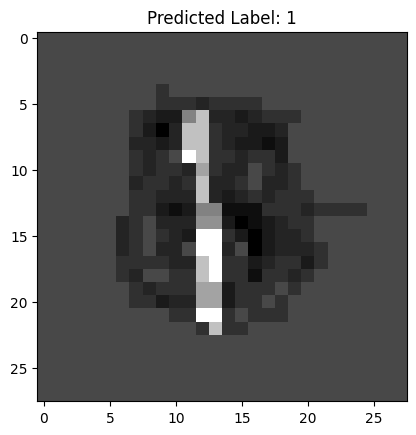

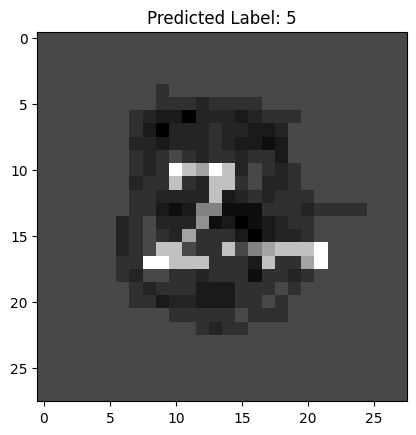

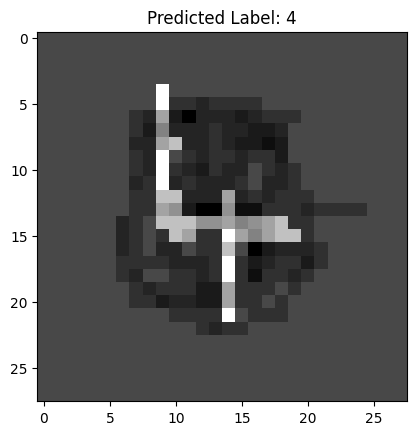

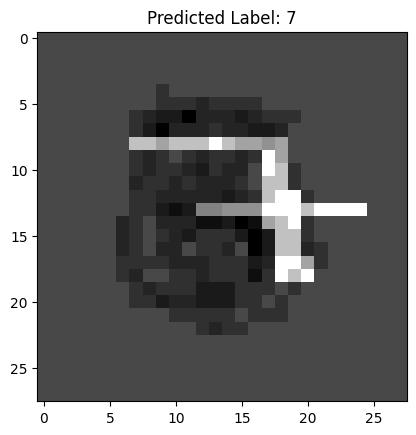

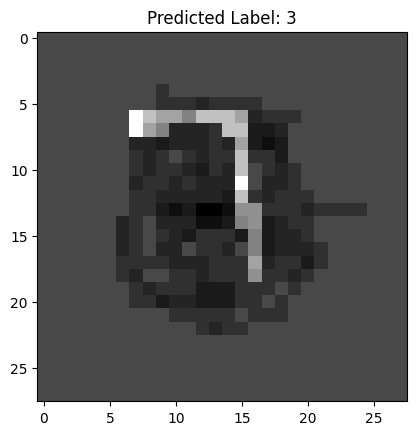

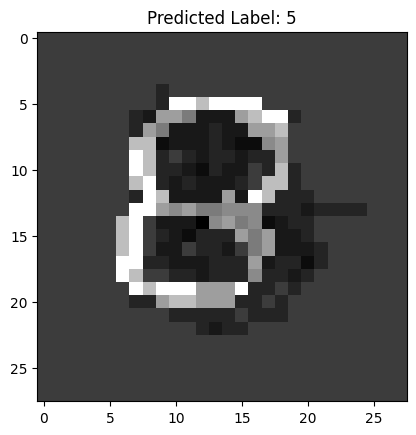

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

# Assuming you have already trained the neural network model (nn) from the previous code
# If you have a different model, replace 'nn' with your model instance

# Replace 'path/to/your/test_file.csv' with the actual path to your test CSV file
test_csv_file_path = '/content/drive/MyDrive/Colab Notebooks/test/output_data.csv'

# Read data from the test CSV file into a pandas DataFrame
test_df = pd.read_csv(test_csv_file_path, header=None)

# Split the test data into features (X_test)
X_test = test_df.iloc[:, :]  # Assuming the labels are in the first column, so taking all columns except the first one

# Normalize features to the range [0, 1]
X_test = X_test / 255.0

# Convert features to a NumPy array
# Assuming each row represents a flattened image
X_test = X_test.values.reshape(-1, 28, 28, 1)


# Standardize pixel values using the same scaler as the training data
X_test = StandardScaler().fit_transform(X_test.reshape(-1, 784)).reshape(-1, 28, 28, 1)

# Make predictions on the test set using the trained model
predictions = nn.predict(X_test.reshape(-1, 784))  # Assuming 'nn' is your trained neural network instance

# Assuming you want the class with the highest probability as the predicted label
predicted_labels = np.argmax(predictions, axis=1)

# Loop through each image and its predicted label
for i in range(len(X_test)):
    # Display the image and its predicted label
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title(f'Predicted Label: {predicted_labels[i]}')
    plt.show()
